In [1]:
! pip install -q kaggle

In [2]:
 ! mkdir ~/.kaggle

In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle competitions download -c expedia-hotel-recommendations

 98% 570M/584M [00:06<00:00, 97.4MB/s]
100% 584M/584M [00:06<00:00, 91.5MB/s]
 84% 65.0M/77.4M [00:00<00:00, 66.9MB/s]
100% 77.4M/77.4M [00:00<00:00, 93.7MB/s]
 88% 5.00M/5.67M [00:00<00:00, 52.3MB/s]
100% 5.67M/5.67M [00:00<00:00, 52.1MB/s]
 26% 5.00M/19.5M [00:00<00:00, 41.0MB/s]
100% 19.5M/19.5M [00:00<00:00, 95.3MB/s]


In [12]:
! unzip train.csv.zip
! unzip test.csv.zip
! unzip destinations.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  destinations.csv.zip
  inflating: destinations.csv        


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
train_df = pd.read_csv("/content/train.csv", nrows = 50000)
dest_df =  pd.read_csv("/content/destinations.csv", nrows = 50000)

In [15]:
train_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21


In [16]:
dest_df.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,...,d110,d111,d112,d113,d114,d115,d116,d117,d118,d119,d120,d121,d122,d123,d124,d125,d126,d127,d128,d129,d130,d131,d132,d133,d134,d135,d136,d137,d138,d139,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.043789,-2.181690,-2.181690,...,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.148982,-2.181690,-2.181690,-2.181690,-2.181690,-2.148982,-2.181690,-2.181690,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,-2.224164,-2.209855,-2.224164,-2.110723,-2.186008,-2.224164,-2.124474,-2.224164,-2.156467,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.153316,-2.186008,-2.224164,-2.224164,-2.224164,-2.128237,-2.158309,-2.059716,-1.910270,-2.224164,-2.123050,...,-2.140393,-2.224164,-2.164722,-2.224164,-2.154997,-2.197327,-2.224164,-2.197327,-2.224164,-2.224164,-2.197327,-2.187005,-2.026263,-2.224164,-2.224164,-2.224164,-2.223818,-2.224164,-2.049280,-2.189562,-2.118483,-2.145558,-2.117811,-2.224164,-2.180182,-2.224164,-2.224164,-2.214572,-2.186008,-2.191569,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,-2.177409,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.130158,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.101291,-2.177409,-2.177409,...,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.161081,-2.177409,-2.177409,-2.161081,-2.130158,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.161081,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,-2.194008,-2.089094,-2.194008,-2.155205,-2.070995,-2.194008,-2.074964,-2.185526,-2.194008,-2.189562,-2.191779,-2.185032,-2.150215,-2.194008,-2.189233,-2.194008,-2.191631,-2.146025,-2.194008,-2.130263,-2.177813,-2.194008,-2.159651,-2.194008,-2.170700,-2.194008,-2.194008,-1.946523,-2.191779,-2.194008,...,-2.180027,-2.194008,-2.194008,-2.19400

In [17]:
train_df.shape

(50000, 24)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


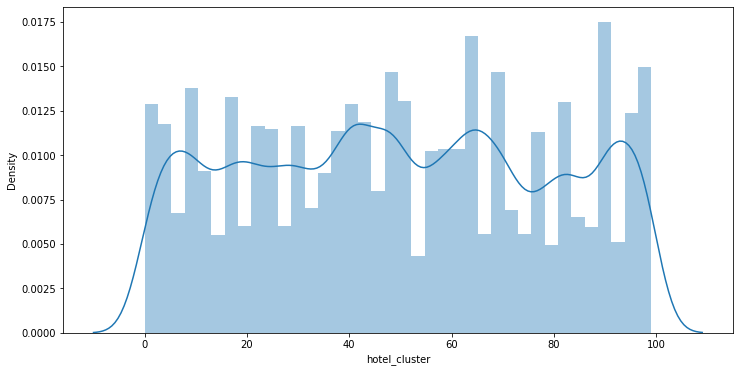

In [18]:
plt.figure(figsize=(12, 6))
sns.distplot(train_df['hotel_cluster'])

In [19]:
train_df.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,30998.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,8.897180,2.650360,83.790000,314.080660,28919.517620,1865.603288,102767.353140,0.128900,0.252600,5.823500,2.039460,0.317640,1.123240,14654.275320,2.623120,0.082080,1.473040,3.266200,79.83306,612.266840,49.637080
std,12.048772,0.745415,52.748348,210.529099,16893.807429,2052.086290,49086.616878,0.335093,0.434508,3.708658,0.904942,0.711277,0.494709,10991.729803,2.165626,0.274489,1.172903,1.665315,54.11810,513.465159,28.942927
min,2.000000,0.000000,0.000000,0.000000,3.000000,0.005600,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,2.000000,3.000000,66.000000,174.000000,14458.000000,269.992450,69003.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,8267.000000,1.000000,0.000000,1.000000,2.000000,50.00000,190.000000,25.000000
50%,2.000000,3.000000,66.000000,311.000000,29370.000000,1105.370050,107548.000000,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,11353.000000,1.000000,0.000000,1.000000,2.000000,50.00000,628.000000,48.000000
75%,11.000000,3.000000,69.000000,385.000000,43181.500000,2537.089075,144246.000000,0.000000,1.000000,9.000000,2.000000,0.000000,1.000000,19253.000000,5.000000,0.000000,2.000000,4.000000,105.00000,705.000000,73.000000
max,53.000000,4.000000,239.000000,1025.000000,56472.000000,11641.224200,181983.000000,1.000000,1.000000,10.000000,9.000000,9.000000,8.000000,65035.000000,9.000000,1.000000,29.000000,6.000000,212.00000,2113.000000,99.000000


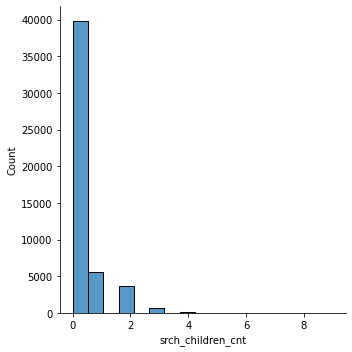

In [20]:
sns.displot(train_df['srch_children_cnt'])

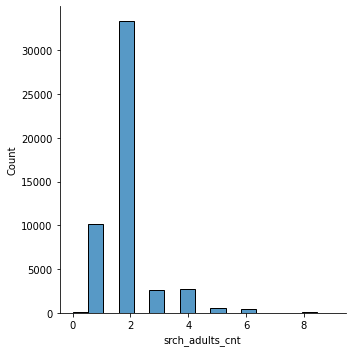

In [21]:
sns.displot(train_df['srch_adults_cnt'])

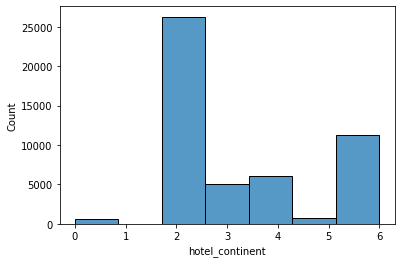

In [22]:
sns.histplot(train_df['hotel_continent'], bins=7)

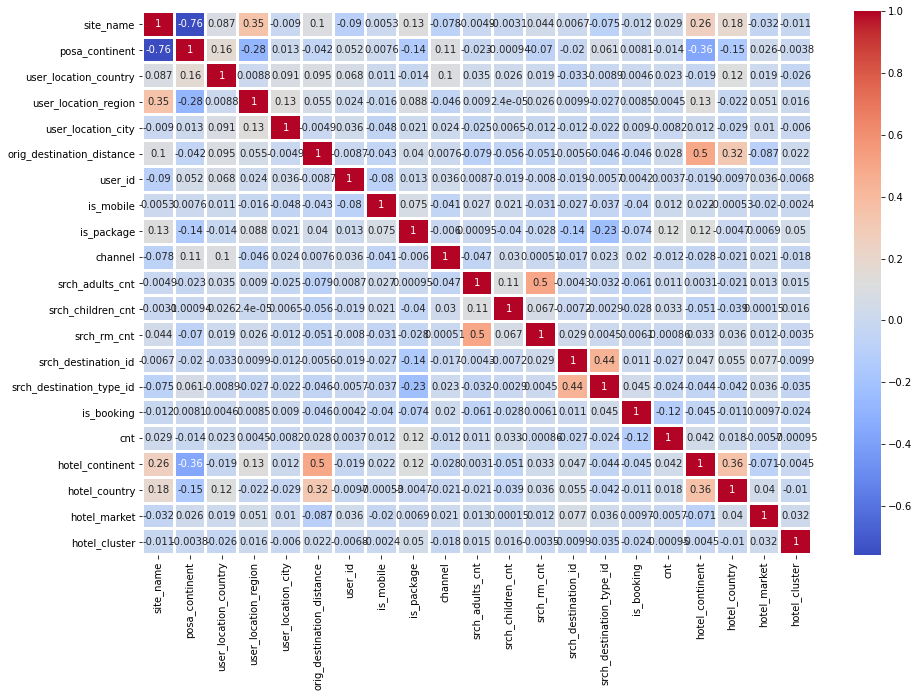

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(train_df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [24]:
def convert_date_into_days(df):
    df['srch_ci'] = pd.to_datetime(df['srch_ci'])
    df['srch_co'] = pd.to_datetime(df['srch_co'])
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    df['stay_dur'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
    df['no_of_days_bet_booking'] = (df['srch_ci'] - df['date_time']).astype('timedelta64[D]')
    
    df['Cin_day'] = df["srch_ci"].apply(lambda x: x.day)
    df['Cin_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['Cin_year'] = df["srch_ci"].apply(lambda x: x.year)

In [26]:
convert_date_into_days(train_df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


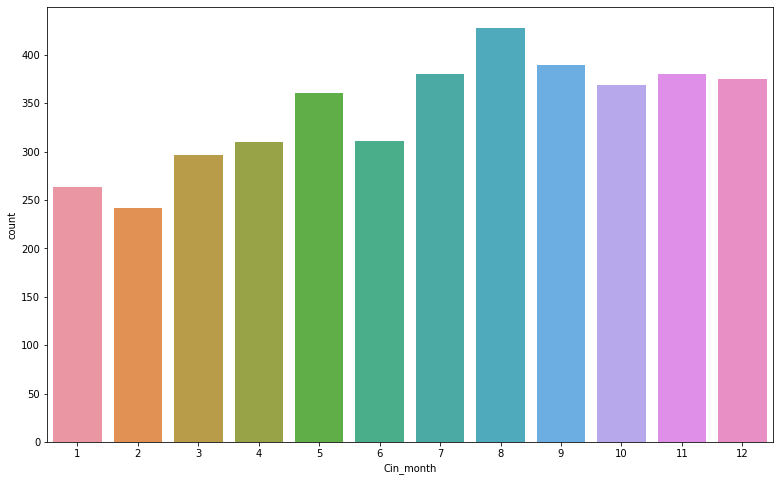

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('Cin_month',data=train_df[train_df["is_booking"] == 1],order=list(range(1,13)),ax=ax)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


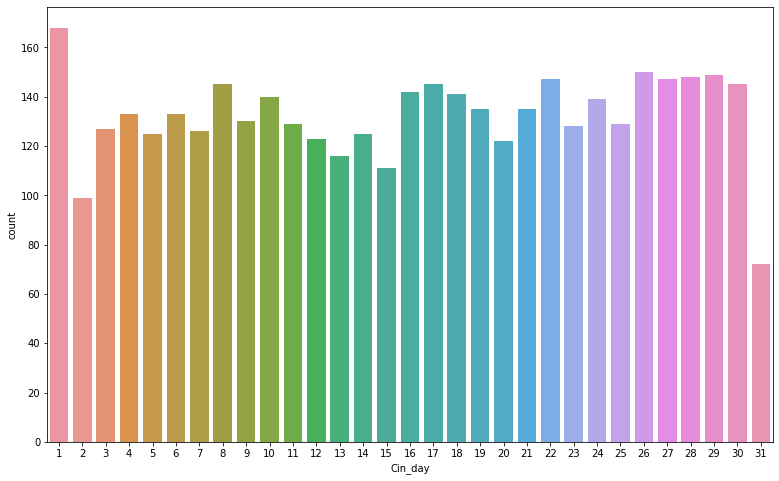

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('Cin_day',data=train_df[train_df["is_booking"] == 1],order=list(range(1,32)),ax=ax)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


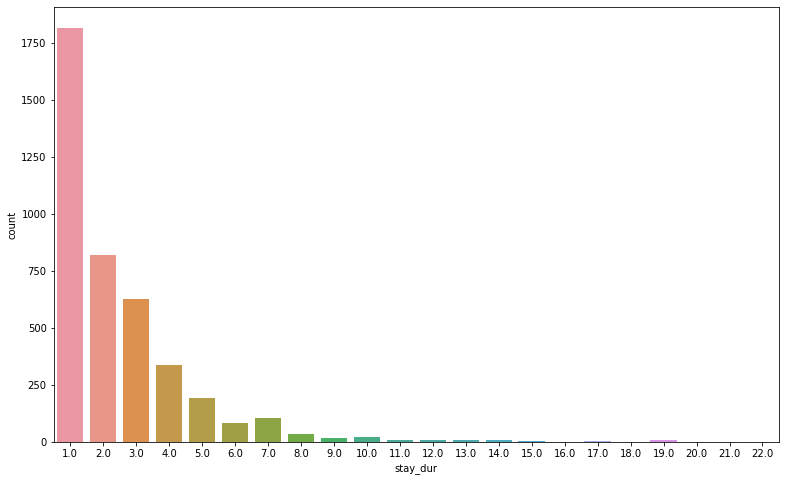

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('stay_dur',data=train_df[train_df["is_booking"] == 1],ax=ax)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


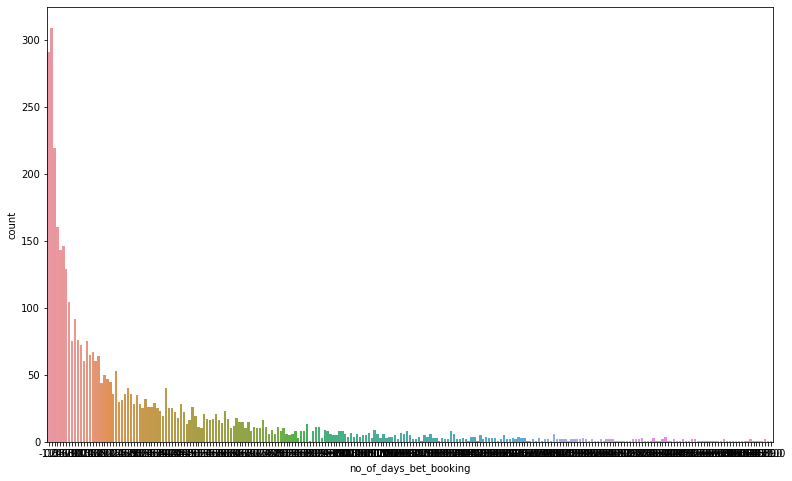

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('no_of_days_bet_booking',data=train_df[train_df["is_booking"] == 1],ax=ax)

In [31]:
train_df['Cin_day'] = train_df['Cin_day'].fillna(1.0)
train_df['Cin_month'] = train_df['Cin_month'].fillna(8.0)
train_df['Cin_year'] = train_df['Cin_year'].fillna(2014.0)
train_df['stay_dur'] = train_df['stay_dur'].fillna(1.0)
train_df['no_of_days_bet_booking'] = train_df['no_of_days_bet_booking'].fillna(0.0)
train_df['orig_destination_distance'].fillna(train_df['orig_destination_distance'].mean(), inplace=True)

In [32]:
train_df

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1,4.0,15.0,27.0,8.0,2014.0
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80,5.0,105.0,23.0,11.0,2014.0
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21,5.0,105.0,23.0,11.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2013-08-26 10:49:35,2,3,66,174,30055,261.2032,181983,0,1,3,2013-09-13,2013-09-15,2,0,1,8250,1,0,1,2,50,628,24,2.0,17.0,13.0,9.0,2013.0
49996,2013-08-26 13:02:50,2,3,66,174,30055,1745.8677,181983,0,1,9,2013-09-11,2013-09-15,2,0,1,8230,1,0,1,2,50,637,98,4.0,15.0,11.0,9.0,2013.0
49997,2013-08-26 13:08:32,2,3,66,174,30055,1745.3398,181983,0,1,9,2013-09-11,2013-09-15,2,0,1,8230,1,0,1,2,50,637,41,4.0,15.0,11.0,9.0,2013.0
49998,2013-08-26 13:28:03,2,3,66,174,30055,1745.9195,181983,0,1,9,2013-09-11,2013-09-15,2,0,1,8230,1,0,1,2,50,637,95,4.0,15.0,11.0,9.0,2013.0


In [33]:
train_df.drop(["srch_ci","srch_co", "date_time"], axis=1)

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year
0,2,3,66,348,48862,2234.2641,12,0,1,9,2,0,1,8250,1,0,3,2,50,628,1,4.0,15.0,27.0,8.0,2014.0
1,2,3,66,348,48862,2234.2641,12,0,1,9,2,0,1,8250,1,1,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
2,2,3,66,348,48862,2234.2641,12,0,0,9,2,0,1,8250,1,0,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
3,2,3,66,442,35390,913.1932,93,0,0,3,2,0,1,14984,1,0,1,2,50,1457,80,5.0,105.0,23.0,11.0,2014.0
4,2,3,66,442,35390,913.6259,93,0,0,3,2,0,1,14984,1,0,1,2,50,1457,21,5.0,105.0,23.0,11.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,3,66,174,30055,261.2032,181983,0,1,3,2,0,1,8250,1,0,1,2,50,628,24,2.0,17.0,13.0,9.0,2013.0
49996,2,3,66,174,30055,1745.8677,181983,0,1,9,2,0,1,8230,1,0,1,2,50,637,98,4.0,15.0,11.0,9.0,2013.0
49997,2,3,66,174,30055,1745.3398,181983,0,1,9,2,0,1,8230,1,0,1,2,50,637,41,4.0,15.0,11.0,9.0,2013.0
49998,2,3,66,174,30055,1745.9195,181983,0,1,9,2,0,1,8230,1,0,1,2,50,637,95,4.0,15.0,11.0,9.0,2013.0


## using sklearn

In [34]:
pieces = [train_df.groupby(['srch_destination_id','hotel_country','hotel_market','hotel_cluster'])['is_booking'].agg(['sum','count'])]
agg = pd.concat(pieces).groupby(level=[0,1,2,3]).sum()
agg.dropna(inplace=True)
agg.head()

sum  count
srch_destination_id hotel_country hotel_market hotel_cluster            
11                  50            824          94               1      2
14                  27            1434         20               1      3
                                               75               0      2
16                  50            419          7                1      2
19                  102           1522         20               0      1

In [35]:
agg['sum_and_cnt'] = 0.85*agg['sum'] + 0.15*agg['count']
agg = agg.groupby(level=[0,1,2]).apply(lambda x: x.astype(float)/x.sum())
agg.reset_index(inplace=True)
agg.head()

,srch_destination_id,hotel_country,hotel_market,hotel_cluster,sum,count,sum_and_cnt
0,11,50,824,94,1.0,1.000000,1.000000
1,14,27,1434,20,1.0,0.600000,0.812500
2,14,27,1434,75,0.0,0.400000,0.187500
3,16,50,419,7,1.0,1.000000,1.000000
4,19,102,1522,20,NaN,0.142857,0.142857


In [36]:
agg_pivot = agg.pivot_table(index=['srch_destination_id','hotel_country','hotel_market'], columns='hotel_cluster', values='sum_and_cnt').reset_index()
agg_pivot.head()

hotel_cluster,srch_destination_id,hotel_country,hotel_market,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,11,50,824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,14,27,1434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.812500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,50,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,102,1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,77,1454,NaN,NaN,NaN,0.034286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017143,NaN,NaN,NaN,0.017143,NaN,NaN,NaN,NaN,0.017143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017143,0.034286,NaN,NaN,NaN,NaN,NaN,0.034286,...,NaN,0.017143,NaN,NaN,0.017143,0.017143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017143,NaN,0.017143,NaN,NaN,0.017143,0.137143,NaN,NaN,0.034286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df = pd.merge(train_df, dest_df, how='left', on='srch_destination_id')

In [38]:
df = pd.merge(df, agg_pivot, how='left', on=['srch_destination_id','hotel_country','hotel_market'])
df = df.fillna(0)
len(df)

50000

In [39]:
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27 00:00:00,2014-08-31 00:00:00,2,0,1,8250,1,0,3,2,50,628,1,4.0,15.0,27.0,8.0,2014.0,-2.283946,-2.346645,-2.400912,-2.367190,-2.273226,-1.722868,-2.392862,-2.381387,-2.239271,-2.259266,-2.305731,...,0.000416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.018701,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.106801,0.000000,0.007619,0.0,0.004987,0.015099,0.0,0.0,0.0,0.054301,0.000416,0.001662,0.015099,0.000831,0.00000,0.002493,0.0,0.002909,0.0,0.0,0.000416
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29 00:00:00,2014-09-02 00:00:00,2,0,1,8250,1,1,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0,-2.283946,-2.346645,-2.400912,-2.367190,-2.273226,-1.722868,-2.392862,-2.381387,-2.239271,-2.259266,-2.305731,...,0.000416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.018701,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.106801,0.000000,0.007619,0.0,0.004987,0.015099,0.0,0.0,0.0,0.054301,0.000416,0.001662,0.015099,0.000831,0.00000,0.002493,0.0,0.002909,0.0,0.0,0.000416
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29 00:00:00,2014-09-02 00:00:00,2,0,1,8250,1,0,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0,-2.283946,-2.346645,-2.400912,-2.367190,-2.273226,-1.722868,-2.392862,-2.381387,-2.239271,-2.259266,-2.305731,...,0.000416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.018701,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.106801,0.000000,0.007619,0.0,0.004987,0.015099,0.0,0.0,0.0,0.054301,0.000416,0.001662,0.015099,0.000831,0.00000,0.002493,0.0,0.002909,0.0,0.0,0.000416
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23 00:00:00,2014-11-28 00:00:00,2,0,1,14984,1,0,1,2,50,1457,80,5.0,105.0,23.0,11.0,2014.0,-2.190551,-2.226874,-2.299968,-2.292375,-2.204695,-1.751842,-2.299968,-2.298818,-1.526474,-2.270565,-2.107172,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01676,0.000000,0.01676,0.00838,0.0,0.0,0.03352,0.0,0.0,0.000000,0.396648,0.000000,0.0,0.092179,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.016760,0.000000,0.008380,0.00838,0.000000,0.0,0.008380,0.0,0.0,0.000000
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23 00:00:00,2014-11-28 00:00:00,2,0,1,14984,1,0,1,2,50,1457,21,5.0,105.0,23.0,11.0,2014.0,-2.190551,-2.226874,-2.299968,-2.292375,-2.204695,-1.751842,-2.299968,-2.298818,-1.526474,-2.270565,-2.107172,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01676,0.000000,0.01676,0.00838,0.0,0.0,0.03352,0.0,0.0,0.000000,0.396648,0.000000,0.0,0.092179,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.016760,0.000000,0.008380,0.00838,0.000000,0.0,0.008380,0.0,0.0,0.000000


In [40]:
df = df.drop(["srch_ci","srch_co", "date_time"], axis=1)

In [41]:
df.shape

(50000, 275)

In [42]:
df = df.loc[df['is_booking'] == 1]

In [43]:
df

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
1,2,3,66,348,48862,2234.264100,12,0,1,9,2,0,1,8250,1,1,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0,-2.283946,-2.346645,-2.400912,-2.367190,-2.273226,-1.722868,-2.392862,-2.381387,-2.239271,-2.259266,-2.305731,-2.400912,-2.369545,-1.712277,...,0.000416,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.018701,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.106801,0.00000,0.007619,0.000000,0.004987,0.015099,0.000000,0.000000,0.0,0.054301,0.000416,0.001662,0.015099,0.000831,0.0,0.002493,0.000000,0.002909,0.000000,0.000000,0.000416
20,2,3,66,318,52078,1865.603288,756,0,1,4,2,0,1,8291,1,1,1,2,50,191,2,2.0,49.0,18.0,4.0,2014.0,-2.292251,-2.299437,-2.299516,-2.081118,-2.012726,-1.846311,-2.256943,-2.241929,-2.296619,-2.272894,-2.089446,-2.299516,-2.073693,-2.126230,...,0.002799,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.011194,0.019590,0.065299,0.000000,0.005597,0.029851,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.002799,0.000000,0.000000,0.005597,0.0,0.000000,0.002799,0.000000,0.046642,0.000000,0.0,0.005597,0.133396,0.000000,0.065299,0.022388,0.008396
27,30,4,195,548,56440,1865.603288,1048,0,1,9,2,0,1,1385,1,1,1,0,185,185,58,8.0,82.0,6.0,9.0,2013.0,-2.219830,-2.273202,-2.237712,-2.273202,-2.199854,-2.040533,-2.273202,-2.235022,-1.558463,-2.236463,-2.141387,-2.273202,-2.085940,-2.178031,...,0.000000,0.000000,0.000000,0.085714,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.085714,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
72,30,4,195,991,47725,1865.603288,1048,0,0,9,2,0,1,8803,1,1,1,3,151,69,36,2.0,214.0,26.0,6.0,2015.0,-2.252985,-2.233293,-2.265921,-2.235883,-1.933998,-1.940680,-2.265921,-2.265921,-2.263863,-2.254906,-2.204170,-2.265921,-2.256010,-2.033865,...,0.000000,0.006073,0.018219,0.000000,0.018219,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.006073,0.012146,0.000000,0.00000,0.107287,0.012146,0.000000,0.000000,0.006073,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.012146
79,2,3,66,462,41898,2454.858800,1482,0,1,1,3,0,2,12009,1,1,1,2,50,680,95,5.0,49.0,22.0,2.0,2014.0,-2.226296,-2.242869,-2.242869,-2.200255,-2.193921,-1.893827,-2.241933,-2.229484,-1.667586,-2.226125,-2.179783,-2.242869,-2.187813,-2.080534,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.096639,0.000000,0.000000,0.012605,0.000000,0.0,0.000000,0.037815,0.037815,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.025210,0.415966,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49956,46,2,194,38,42328,1865.603288,181655,0,1,6,2,0,1,20833,1,1,1,3,182,68,12,3.0,26.0,7.0,8.0,2014.0,-2.206793,-2.249713,-2.249713,-2.190297,-2.212313,-2.049362,-2.249713,-2.249713,-1.605521,-2.248808,-2.207062,-2.249713,-1.959722,-2.183160,...,0.000000,0.

In [47]:
y = df["hotel_cluster"]
X = df.drop(["is_booking", "hotel_cluster","user_id"], axis = 1)

In [48]:
X.shape

(4104, 272)

In [49]:
y.shape

(4104,)

In [50]:
X

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
1,2,3,66,348,48862,2234.264100,0,1,9,2,0,1,8250,1,1,2,50,628,4.0,17.0,29.0,8.0,2014.0,-2.283946,-2.346645,-2.400912,-2.367190,-2.273226,-1.722868,-2.392862,-2.381387,-2.239271,-2.259266,-2.305731,-2.400912,-2.369545,-1.712277,-2.399467,-1.901553,-2.065535,...,0.000416,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.018701,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.106801,0.00000,0.007619,0.000000,0.004987,0.015099,0.000000,0.000000,0.0,0.054301,0.000416,0.001662,0.015099,0.000831,0.0,0.002493,0.000000,0.002909,0.000000,0.000000,0.000416
20,2,3,66,318,52078,1865.603288,0,1,4,2,0,1,8291,1,1,2,50,191,2.0,49.0,18.0,4.0,2014.0,-2.292251,-2.299437,-2.299516,-2.081118,-2.012726,-1.846311,-2.256943,-2.241929,-2.296619,-2.272894,-2.089446,-2.299516,-2.073693,-2.126230,-2.299516,-1.907082,-2.224969,...,0.002799,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.011194,0.019590,0.065299,0.000000,0.005597,0.029851,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.002799,0.000000,0.000000,0.005597,0.0,0.000000,0.002799,0.000000,0.046642,0.000000,0.0,0.005597,0.133396,0.000000,0.065299,0.022388,0.008396
27,30,4,195,548,56440,1865.603288,0,1,9,2,0,1,1385,1,1,0,185,185,8.0,82.0,6.0,9.0,2013.0,-2.219830,-2.273202,-2.237712,-2.273202,-2.199854,-2.040533,-2.273202,-2.235022,-1.558463,-2.236463,-2.141387,-2.273202,-2.085940,-2.178031,-2.273202,-2.225242,-2.161337,...,0.000000,0.000000,0.000000,0.085714,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.085714,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
72,30,4,195,991,47725,1865.603288,0,0,9,2,0,1,8803,1,1,3,151,69,2.0,214.0,26.0,6.0,2015.0,-2.252985,-2.233293,-2.265921,-2.235883,-1.933998,-1.940680,-2.265921,-2.265921,-2.263863,-2.254906,-2.204170,-2.265921,-2.256010,-2.033865,-2.265921,-2.042272,-2.201674,...,0.000000,0.006073,0.018219,0.000000,0.018219,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.006073,0.012146,0.000000,0.00000,0.107287,0.012146,0.000000,0.000000,0.006073,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.012146
79,2,3,66,462,41898,2454.858800,0,1,1,3,0,2,12009,1,1,2,50,680,5.0,49.0,22.0,2.0,2014.0,-2.226296,-2.242869,-2.242869,-2.200255,-2.193921,-1.893827,-2.241933,-2.229484,-1.667586,-2.226125,-2.179783,-2.242869,-2.187813,-2.080534,-2.242869,-1.892498,-2.227506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.096639,0.000000,0.000000,0.012605,0.000000,0.0,0.000000,0.037815,0.037815,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.025210,0.415966,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49956,46,2,194,38,42328,1865.603288,0,1,6,2,0,1,20833,1,1,3,182,68,3.0,26.0,7.0,8.0,2014.0,-2.206793,-2.249713,-2.249713,-2.190297,-2.212313,-2.049362,-2.249713,-2.249713,-1.

In [51]:
type(X.iloc[0,:])

pandas.core.series.Series

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm

### Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
clf = make_pipeline(preprocessing.StandardScaler(), GaussianNB(priors=None))
np.mean(cross_val_score(clf, X, y, cv=10))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.10770340039166815

### K-Nearest Neighbors Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=5))
np.mean(cross_val_score(clf1, X, y, cv=10, scoring='accuracy'))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.3979188178743101

### Random Forest Classifier

In [55]:
clf2 = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(n_estimators=273,max_depth=10,random_state=0))
np.mean(cross_val_score(clf2, X, y, cv=10))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.34990326983561804

### Multi-class Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
clf3 = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(multi_class='ovr'))
np.mean(cross_val_score(clf3, X, y, cv=10))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown

0.40985401459854015

### SVM Classifier

In [58]:
from sklearn import svm
clf4 = make_pipeline(preprocessing.StandardScaler(), svm.SVC(decision_function_shape='ovo', probability=True))
np.mean(cross_val_score(clf4, X, y, cv=10))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.4537143196249481

In [62]:
clf4.fit(X,y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovo', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [67]:
def result(x):
    x = x.to_numpy().reshape(1,-1)
    res = clf4.predict_proba(x)
    return res.argsort().ravel()[::-1][:5]

In [71]:
X["prediction"] = X.apply(lambda x: result(x), axis =1)

In [72]:
X

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,prediction
1,2,3,66,348,48862,2234.264100,0,1,9,2,0,1,8250,1,1,2,50,628,4.0,17.0,29.0,8.0,2014.0,-2.283946,-2.346645,-2.400912,-2.367190,-2.273226,-1.722868,-2.392862,-2.381387,-2.239271,-2.259266,-2.305731,-2.400912,-2.369545,-1.712277,-2.399467,-1.901553,-2.065535,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.018701,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.106801,0.00000,0.007619,0.000000,0.004987,0.015099,0.000000,0.000000,0.0,0.054301,0.000416,0.001662,0.015099,0.000831,0.0,0.002493,0.000000,0.002909,0.000000,0.000000,0.000416,"[1, 45, 24, 51, 79]"
20,2,3,66,318,52078,1865.603288,0,1,4,2,0,1,8291,1,1,2,50,191,2.0,49.0,18.0,4.0,2014.0,-2.292251,-2.299437,-2.299516,-2.081118,-2.012726,-1.846311,-2.256943,-2.241929,-2.296619,-2.272894,-2.089446,-2.299516,-2.073693,-2.126230,-2.299516,-1.907082,-2.224969,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.011194,0.019590,0.065299,0.000000,0.005597,0.029851,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.002799,0.000000,0.000000,0.005597,0.0,0.000000,0.002799,0.000000,0.046642,0.000000,0.0,0.005597,0.133396,0.000000,0.065299,0.022388,0.008396,"[95, 37, 91, 9, 21]"
27,30,4,195,548,56440,1865.603288,0,1,9,2,0,1,1385,1,1,0,185,185,8.0,82.0,6.0,9.0,2013.0,-2.219830,-2.273202,-2.237712,-2.273202,-2.199854,-2.040533,-2.273202,-2.235022,-1.558463,-2.236463,-2.141387,-2.273202,-2.085940,-2.178031,-2.273202,-2.225242,-2.161337,...,0.000000,0.000000,0.085714,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.085714,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"[58, 81, 36, 25, 64]"
72,30,4,195,991,47725,1865.603288,0,0,9,2,0,1,8803,1,1,3,151,69,2.0,214.0,26.0,6.0,2015.0,-2.252985,-2.233293,-2.265921,-2.235883,-1.933998,-1.940680,-2.265921,-2.265921,-2.263863,-2.254906,-2.204170,-2.265921,-2.256010,-2.033865,-2.265921,-2.042272,-2.201674,...,0.006073,0.018219,0.000000,0.018219,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.006073,0.012146,0.000000,0.00000,0.107287,0.012146,0.000000,0.000000,0.006073,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.012146,"[29, 36, 46, 81, 12]"
79,2,3,66,462,41898,2454.858800,0,1,1,3,0,2,12009,1,1,2,50,680,5.0,49.0,22.0,2.0,2014.0,-2.226296,-2.242869,-2.242869,-2.200255,-2.193921,-1.893827,-2.241933,-2.229484,-1.667586,-2.226125,-2.179783,-2.242869,-2.187813,-2.080534,-2.242869,-1.892498,-2.227506,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.096639,0.000000,0.000000,0.012605,0.000000,0.0,0.000000,0.037815,0.037815,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.025210,0.415966,0.000000,0.000000,0.000000,0.000000,"[95, 47, 91, 69, 68]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49956,46,2,194,38,42328,1865.603288,0,1,6,2,0,1,20833,1,1,3,182,68,3.0,26.0,7.0,8.0,2014.0,-2.2067

In [90]:
res_df = X[["srch_destination_id","srch_adults_cnt","srch_children_cnt","stay_dur","prediction"]]

In [91]:
res_df

,srch_destination_id,srch_adults_cnt,srch_children_cnt,stay_dur,prediction
1,8250,2,0,4.0,"[1, 45, 24, 51, 79]"
20,8291,2,0,2.0,"[95, 37, 91, 9, 21]"
27,1385,2,0,8.0,"[58, 81, 36, 25, 64]"
72,8803,2,0,2.0,"[29, 36, 46, 81, 12]"
79,12009,3,0,5.0,"[95, 47, 91, 69, 68]"
...,...,...,...,...,...
49956,20833,2,0,3.0,"[12, 81, 36, 46, 30]"
49970,11625,4,1,1.0,"[15, 25, 48, 91, 16]"
49973,12175,2,0,3.0,"[19, 31, 10, 91, 72]"
49976,11625,6,1,1.0,"[15, 25, 90, 48, 91]"


In [94]:
res_df.to_csv("result.csv", encoding='utf-8')